# NKIS policy report data cleaning

## report ~ 2018

In [3]:
import pandas as pd
import numpy as np

In [4]:
report_2018 = pd.read_excel('../Data/NKIS_raw/NKIS_190510.xlsx')
report_2018 = report_2018.rename(columns={"보고서명": "Title", "영문보고서명": "English title",
                            "등록기관": "Institute","출판년도": "Year","연구유형": "Type","연구책임자명": "Responsibility",
                            "내부연구참여자":"Internal Author","외부연구참여자":"External Author", "국문초록":"Abstract", "핵심키워드":"Keywords"})
report_2018.head()

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords
0,21세기 생물산업 창조를 향한 일본 정부의 기본전략과 프로젝트,NaN,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,NaN,NaN,지금까지 경제구조의 변혁과 창조를 위한 행동계획(1997년 5월 16일 각료회의 결...,"바이오테크놀로지산업,21세기,생물산업,창조,일본 정부,기본전략,프로젝트"
1,EU의 연구개발 정책동향,R&D Policy Trends in the EU,과학기술정책연구원,2000,기본연구보고서,과학기술,과학기술일반,정성철,과학기술정책연구원,NaN,NaN,NaN,NaN,NaN,"EU는 미국, 일본과 함께 세계 과학기술 발전을 주도하고 있는 국가군으로써, OEC...","EU,연구개발,정책동향"
2,PBS의 관련 개념과 적용조건,NaN,과학기술정책연구원,2000,기본연구보고서,경제,예산,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,NaN,NaN,1990년대 접어들면서 세계시장의 경쟁환경이 점점 심화됨에 따라 국가경쟁력을높이기 ...,"PBS,개념,적용조건"
3,R&D 평가시스템의 이론적 체계 구축 및 적용방안에 관한 연구,A Framework for R&D Evaluation System and Its ...,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,이정원,과학기술정책연구원,NaN,NaN,NaN,NaN,NaN,본 연구는 연구개발활동뿐 아니라 연구개발 평가 자체의 효율성을 높이고 그 결과가 효...,"R&D 평가시스템,이론적 체계 구축,적용방안"
4,개방형·모듈형 기술패러다임에 대응한 기술혁신전략 - 리눅스를 중심으로,NaN,과학기술정책연구원,2000,기본연구보고서,방송·통신·정보,정보,송위진,과학기술정책연구원,NaN,NaN,NaN,NaN,NaN,"인터넷의 발전과 리눅스의 확산에 따라 기술개발 환경에 개방화(openness) , ...","개방형·모듈형,기술패러다임,기술혁신,리눅스"


In [5]:
len(report_2018)

21584

## Data cleaning

### Removing missing values 

#### report~2018

In [6]:
report_2018[report_2018['Title'].isna()]

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords


There is no nan title data

In [31]:
report_2018['Abstract'] = report_2018['Abstract'].apply(lambda x: x.replace(" ",""))
report_2018['Abstract'] = report_2018['Abstract'].apply(lambda x: np.nan if (x == "") else x)

In [32]:
report_2018[report_2018['Abstract'].isna()].head()

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords
12196,THE OUTLOOK FOR NORTHEAST ASIA IN 2015: A U.S....,THE OUTLOOK FOR NORTHEAST ASIA IN 2015: A U.S....,경제인문사회연구회,2012,협동연구보고서,국제통상 및 외교안보,국제협력 및 국제문제,경제·인문사회연구회,경제인문사회연구회,NaN,NaN,NaN,0,0,NaN,"해외,2015년,동북아,위상관계"
12326,Korea’s Strategy for Development of STI Capaci...,Korea's Strategy for Development of STI Capaci...,과학기술정책연구원,2012,수시연구보고서,종합일반,종합일반,신태영,과학기술정책연구원,NaN,NaN,NaN,"[홍성주, 강주윤]",0,NaN,"Innovation System, Korean Innovation, Industri..."
12360,Compensation Valuation System for Urban Develo...,Compensation Valuation System for Urban Develo...,국토연구원,2012,수시연구보고서,국토개발,도시·지역계획,Jung Hee-nam,국토연구원,NaN,NaN,NaN,"[YooSeon-Jong, SeoGyeong-Hwa, KimGi-Seon, Park...",0,NaN,"Compensation, Valuation System, Developing Cou..."
12363,개발도상국 저소득층 주거복지 및 지역발전을 위한 정책연구,Strategy and Policy to Improve the Housing Wel...,국토연구원,2012,수시연구보고서,국토개발,주택개발,Kyunghwan Sohn,국토연구원,NaN,NaN,NaN,[YujinBae],"[JohnHosungLee, LeThuyHa, WahyuMulyana, Veroni...",NaN,"Strategy,Developing Countries,assessment"
12449,"China, World Economy and Korea-China Economic ...","China, World Economy and Korea-China Economic ...",대외경제정책연구원,2012,기본연구보고서,경제,경제일반,Wook Chae,대외경제정책연구원,NaN,NaN,NaN,[PyeongSeobYang],0,NaN,"CHINA,ECONOMY,COOPERATION"


remove nan abstract

In [33]:
report_2018 = report_2018[report_2018['Abstract'].notna()]
report_2018[report_2018['Abstract'].isna()].head()

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords


### change author string into list

In [9]:
report_2018['External Author'] = report_2018['External Author'].apply(lambda x: x.replace(" ","").rstrip(',').split(',') 
                                                                      if type(x) != np.float else 0)
report_2018['Internal Author'] = report_2018['Internal Author'].apply(lambda x: x.replace(" ","").rstrip(',').split(',') 
                                                                      if type(x) != np.float else 0)
report_2018.head()

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords
0,21세기 생물산업 창조를 향한 일본 정부의 기본전략과 프로젝트,NaN,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,지금까지 경제구조의 변혁과 창조를 위한 행동계획(1997년 5월 16일 각료회의 결...,"바이오테크놀로지산업,21세기,생물산업,창조,일본 정부,기본전략,프로젝트"
1,EU의 연구개발 정책동향,R&D Policy Trends in the EU,과학기술정책연구원,2000,기본연구보고서,과학기술,과학기술일반,정성철,과학기술정책연구원,NaN,NaN,NaN,0,0,"EU는 미국, 일본과 함께 세계 과학기술 발전을 주도하고 있는 국가군으로써, OEC...","EU,연구개발,정책동향"
2,PBS의 관련 개념과 적용조건,NaN,과학기술정책연구원,2000,기본연구보고서,경제,예산,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,1990년대 접어들면서 세계시장의 경쟁환경이 점점 심화됨에 따라 국가경쟁력을높이기 ...,"PBS,개념,적용조건"
3,R&D 평가시스템의 이론적 체계 구축 및 적용방안에 관한 연구,A Framework for R&D Evaluation System and Its ...,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,이정원,과학기술정책연구원,NaN,NaN,NaN,0,0,본 연구는 연구개발활동뿐 아니라 연구개발 평가 자체의 효율성을 높이고 그 결과가 효...,"R&D 평가시스템,이론적 체계 구축,적용방안"
4,개방형·모듈형 기술패러다임에 대응한 기술혁신전략 - 리눅스를 중심으로,NaN,과학기술정책연구원,2000,기본연구보고서,방송·통신·정보,정보,송위진,과학기술정책연구원,NaN,NaN,NaN,0,0,"인터넷의 발전과 리눅스의 확산에 따라 기술개발 환경에 개방화(openness) , ...","개방형·모듈형,기술패러다임,기술혁신,리눅스"


In [10]:
report_2018

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords
0,21세기 생물산업 창조를 향한 일본 정부의 기본전략과 프로젝트,NaN,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,지금까지 경제구조의 변혁과 창조를 위한 행동계획(1997년 5월 16일 각료회의 결...,"바이오테크놀로지산업,21세기,생물산업,창조,일본 정부,기본전략,프로젝트"
1,EU의 연구개발 정책동향,R&D Policy Trends in the EU,과학기술정책연구원,2000,기본연구보고서,과학기술,과학기술일반,정성철,과학기술정책연구원,NaN,NaN,NaN,0,0,"EU는 미국, 일본과 함께 세계 과학기술 발전을 주도하고 있는 국가군으로써, OEC...","EU,연구개발,정책동향"
2,PBS의 관련 개념과 적용조건,NaN,과학기술정책연구원,2000,기본연구보고서,경제,예산,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,1990년대 접어들면서 세계시장의 경쟁환경이 점점 심화됨에 따라 국가경쟁력을높이기 ...,"PBS,개념,적용조건"
3,R&D 평가시스템의 이론적 체계 구축 및 적용방안에 관한 연구,A Framework for R&D Evaluation System and Its ...,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,이정원,과학기술정책연구원,NaN,NaN,NaN,0,0,본 연구는 연구개발활동뿐 아니라 연구개발 평가 자체의 효율성을 높이고 그 결과가 효...,"R&D 평가시스템,이론적 체계 구축,적용방안"
4,개방형·모듈형 기술패러다임에 대응한 기술혁신전략 - 리눅스를 중심으로,NaN,과학기술정책연구원,2000,기본연구보고서,방송·통신·정보,정보,송위진,과학기술정책연구원,NaN,NaN,NaN,0,0,"인터넷의 발전과 리눅스의 확산에 따라 기술개발 환경에 개방화(openness) , ...","개방형·모듈형,기술패러다임,기술혁신,리눅스"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21579,생태공학적 기법을 활용한 지역단위 생태계 보호지역 확대방안,Prioritizing ecologically important areas for ...,한국환경정책·평가연구원,2018,기본연구보고서,환경,환경일반,구경아,한국환경정책·평가연구원,NaN,NaN,NaN,"[오일찬, 박선욱, 이현우, 홍현정]",0,본 연구에서는 다양한 생태계의 보전 및 생물다양성 보전과 증진을 통한 생태계의 지속...,"보호지역, 국립공원, 생태공학, 지역 생태계, 토지이용변화, 제주도"
21580,가뭄지역 농촌용수 개발계획의 전략환경영향평가 개선방안 연구 : 지하수-지표수 복합이...,Improving effectiveness of strategic environme...,한국환경정책·평가연구원,2018,기본연구보고서,환경,환경일반,김경호,한국환경정책·평가연구원,NaN,NaN,NaN,"[박종윤, 하지연, 안준영, 이후승]",0,본 연구는 가뭄지역의 농촌용수 개발계획을 친환경적이고 지속가능한 이수 방안으로 수립...,"전략환경영향평가, 농촌용수 개발계획, 지하수-지표수 복합이용, 저수지(소규모 댐),..."
21581,원자력시설 해체 부지의 재사용을 위한 환경관리 전략 : 토양 및 지하수 분야를 중심으로,Environmental strategy for site reuse of decom...,한국환경정책·평가연구원,2018,기본연구보고서,환경,환경일반,신경희,한국환경정책·평가연구원,NaN,NaN,NaN,"[이희선, 권진경, 조공장, 김경호, 양경]",0,고리 1호기의 영구 정지 및 해체 확정에 이어 월성 1호기는 조기 폐쇄 결정을 내린...,"원자력시설, 해체, 재사용, 환경관리, 토양·지하수"
21582,중소하천 물환경 개선을 위한 용배수로 관리 및 활용 방안,Management policy of irrigation and drainage c...,한국환경정책·평가연구원,2018,기본연구보고서,환경,수질오염,김익재,한국환경정책·평가연구원,NaN,NaN,NaN,"[박종윤, 곽효은, 김교범]",0,그동안 우리나라 하천의 관리와 재정투자는 대하천 위주로 추진되어 왔다. 이러한 대하...,"중소하천, 물환경, 용수로, 배수로, 농업용수, 비점오염수질부하, 물관리 일원화"


#### Double Check list : affiliation of co-responsibility & external responsibility

In [11]:
report_2018['Institute'] = report_2018['Institute'].apply(lambda x : x.replace('·',""))
report_2018['연구책임자 소속기관'] = report_2018['연구책임자 소속기관'].apply(lambda x : x.replace('·',""))
report_2018['연구책임자 소속기관'] = report_2018['연구책임자 소속기관'].apply(lambda x : x.replace('ㆍ',""))

In [12]:
coauthor = report_2018[(report_2018['공동책임자1'].notna())]

In [13]:
diff_respons_affil = report_2018[(report_2018['Institute']!=report_2018['연구책임자 소속기관'])&(report_2018['Internal Author']!=0)&(report_2018['External Author']!=0)]

In [14]:
Have_to_check_list = pd.concat([coauthor,diff_respons_affil])

In [15]:
len(Have_to_check_list)

961

In [16]:
Have_to_check_list[~Have_to_check_list.index.duplicated(keep='first')]

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords
12150,국가 공공건축 지원센터 구축 및 운영방안 연구(II),The Establishment and Operation of the Nationa...,건축도시공간연구소,2012,협동연구보고서,국토개발,국토개발일반,서수정,건축도시공간연구소,류현숙,정지범,NaN,"[김영현, 조시은, 이언화]",0,"제1장 서론_x000D_\n공공건축은 지역주민의 삶의 질과 직결되며, 지역의 정체성...","공공건축,지원센터,운영방안"
12154,공생발전의 이론적 위상 정립 연구,NaN,경제인문사회연구회,2012,협동연구보고서,종합일반,종합일반,고상두,연세대학교,황지환,NaN,NaN,0,0,우리사회는 그동안 미국의 신자유주의적 발전모델과 북유럽의 복지국가 발전모델을 이상적...,"공생발전, 국가, 시장, 시민사회, 대기업, 중소기업, 네트워크, 제도"
12158,기업경영 패러다임의 전환 유도 방안,NaN,경제인문사회연구회,2012,협동연구보고서,경제,경제일반,김진기,한국항공대학교,이상명,NaN,NaN,0,"[최다운, 손정웅]",기업 활동에 기반을 둔 효율성의 극대화는 우리의 삶을 물질적 풍요로움으로 끌었으며 ...,"공생발전, 기업공유가치, 사회적책임, 기업경영 패러다임"
12169,사회적 경제공동체 육성연구,NaN,경제인문사회연구회,2012,협동연구보고서,경제,경제일반,임병인,충북대학교,김영세,NaN,NaN,0,0,본 연구는 주주자본주의(shareholder's capitalism)를 극복 내지 ...,"사회적 경제공동체,공생발전,중소기업"
12205,정책결정 및 수행 과정에서 합리성의 세 층위적 고려 방안,NaN,경제인문사회연구회,2012,연구회보고서,사회문제,사회문제일반,이상욱,한양대학교,미야가와 타쿠야,NaN,NaN,0,"[오경준, 김지아]",본 연구는 과학기술학(Science and Technology Studies) 및 ...,"정책결정, 합리성, 경제적 합리성, 인문학적 합리성, 사회문화적 합리성"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20648,지속가능한발전목표(SDGs)와 기후변화 국가자발적공약(NDC) 연계이행에 대한 연구...,NaN,경제인문사회연구회,2018,협동연구보고서,환경,수질오염,김호석,한국환경정책평가연구원,NaN,NaN,NaN,[이지예],"[XinZHOU, MustafaMOINUDDIN, DiegoSILVAHERRAN]",2030의제와 파리협정은 최근 국내 정책에 가장 큰 영향을 주고 있는 국제적 합의이...,"SDGs,지속가능발전, NDC,기후변화"
20649,도농복합지역 육아지원 실태 및 개선 방안,NaN,경제인문사회연구회,2018,협동연구보고서,사회문제,사회문제일반,김은설,육아정책연구소,NaN,NaN,NaN,"[김지현, 이재희, 김혜진]",[안석],농어촌의 인구는 2000년대 이후 급격히 줄어들고 있으며 영유아 수는 더욱 감소되어...,"도농복합지역, 영유아, 돌봄교실"
20650,청년 해외취업 지원 강화 방안,NaN,경제인문사회연구회,2018,협동연구보고서,경제,경제일반,조희경,한국직업능력개발원,NaN,NaN,NaN,"[채창균, 김은우]","[김정희, 윤지현, 최상문]",1. 서론_x000D_\n가. 연구의 필요성 및 목적_x000D_\n통계청의 ‘20...,"청년실업,해외취업, K-Move 스쿨 사업"
20651,한반도 비핵/평화 프로세스와 남북한 군비통제 추진전략,NaN,경제인문사회연구회,2018,협동연구보고서,사회문제,사회문제일반,김갑식,통일연구원,NaN,NaN,NaN,[서보혁],"[김동엽, 박원곤, 문용일]",본 연구는 최근 안보환경의 변화 속에서 비핵/평화 프로세스와 연계하여 남북한 군비통...,"비핵화, 평화체제, 군비통제"


In [27]:
del Have_to_check_list['Abstract']

In [95]:
Have_to_check_list[~Have_to_check_list.index.duplicated(keep='first')].to_csv('../Data/NKIS_raw/Have_to_check.csv')

# Data Parsing

Khaiii module tokenize Korean sentence into morphemes

https://github.com/kakao/khaiii

In [17]:
from khaiii import KhaiiiApi
api = KhaiiiApi()

### Extract Noun

NNP: Proper noun
, NNG: General noun

In [18]:
def Extract_noun(sentence):
    noun_list = []
    for word in api.analyze(sentence):
        for morph in word.morphs:
            if morph.tag in ['NNG', 'NNP']:
                noun_list.append(morph.lex)
    return noun_list

In [22]:
from tqdm import tqdm

In [28]:
report_2018['Abstract'][12196]

''

In [34]:
Parse_abstact=[]
for i in tqdm(report_2018.index):
    try:
        Parse_abstact.append(Extract_noun(report_2018['Abstract'][i]))
    except: 
        print(i)

100%|██████████| 20769/20769 [11:17<00:00, 30.65it/s] 


In [37]:
report_2018['Abstract'] = Parse_abstact

/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
Parse_title=[]
for i in tqdm(report_2018.index):
    try:
        Parse_title.append(Extract_noun(report_2018['Title'][i]))
    except: 
        print(i)

100%|██████████| 20769/20769 [00:12<00:00, 1618.02it/s]


In [40]:
report_2018['Title'] = Parse_title

/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
report_2018

,Title,English title,Institute,Year,Type,표준분류(대),표준분류(중),Responsibility,연구책임자 소속기관,공동책임자1,공동책임자2,공동책임자3,Internal Author,External Author,Abstract,Keywords,Total
0,"[세기, 생물, 산업, 창조, 일본, 정부, 기본, 전략, 프로젝트]",NaN,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,"[지금, 경제, 구조, 변혁, 창조, 동, 계획, 각료회, 결정, 라, 이프사이언스...","바이오테크놀로지산업,21세기,생물산업,창조,일본 정부,기본전략,프로젝트","[세기, 생물, 산업, 창조, 일본, 정부, 기본, 전략, 프로젝트, 지금, 경제,..."
1,"[연구, 개발, 정책, 동향]",R&D Policy Trends in the EU,과학기술정책연구원,2000,기본연구보고서,과학기술,과학기술일반,정성철,과학기술정책연구원,NaN,NaN,NaN,0,0,"[미국, 일본, 세계, 과학기술발전, 주도, 국가군, 연구, 개발, 투자, 차지, ...","EU,연구개발,정책동향","[연구, 개발, 정책, 동향, 미국, 일본, 세계, 과학기술발전, 주도, 국가군, ..."
2,"[관련, 개념, 적용, 조건]",NaN,과학기술정책연구원,2000,기본연구보고서,경제,예산,과학기술정책연구원,과학기술정책연구원,NaN,NaN,NaN,0,0,"[세계, 시장, 경쟁, 환경, 점, 심화, 국가경쟁력, 노력, 한층가속, 시작, 선...","PBS,개념,적용조건","[관련, 개념, 적용, 조건, 세계, 시장, 경쟁, 환경, 점, 심화, 국가경쟁력,..."
3,"[평가, 시스템, 이론, 체계, 구축, 적용, 방안, 연구]",A Framework for R&D Evaluation System and Its ...,과학기술정책연구원,2000,기본연구보고서,과학기술,기술개발,이정원,과학기술정책연구원,NaN,NaN,NaN,0,0,"[본연구, 연구, 개발활동, 연구개발, 평가자체, 효율, 결과, 효과, 연구, 개발...","R&D 평가시스템,이론적 체계 구축,적용방안","[평가, 시스템, 이론, 체계, 구축, 적용, 방안, 연구, 본연구, 연구, 개발활..."
4,"[개방, 모듈, 기술, 패러다임, 대응, 기술, 혁신, 전략, 리눅스, 중심]",NaN,과학기술정책연구원,2000,기본연구보고서,방송·통신·정보,정보,송위진,과학기술정책연구원,NaN,NaN,NaN,0,0,"[인터넷, 발전, 리눅스, 확산, 기술개발환경, 개방, 모듈, 구조, 변화, 인터넷...","개방형·모듈형,기술패러다임,기술혁신,리눅스","[개방, 모듈, 기술, 패러다임, 대응, 기술, 혁신, 전략, 리눅스, 중심, 인터..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21579,"[생태, 공학, 기법, 활용, 지역, 단위, 생태, 보호, 지역, 확대, 방안]",Prioritizing ecologically important areas for ...,한국환경정책평가연구원,2018,기본연구보고서,환경,환경일반,구경아,한국환경정책평가연구원,NaN,NaN,NaN,"[오일찬, 박선욱, 이현우, 홍현정]",0,"[본연구, 다양, 생태, 보전, 생물다양성보전, 증진, 생태, 지속가능, 이용, 나...","보호지역, 국립공원, 생태공학, 지역 생태계, 토지이용변화, 제주도","[생태, 공학, 기법, 활용, 지역, 단위, 생태, 보호, 지역, 확대, 방안, 본..."
21580,"[가뭄, 지역, 농촌, 용수, 개발, 계획, 전략, 환경, 영향, 평가, 개선, 방...",Improving effectiveness of strategic environme...,한국환경정책평가연구원,2018,기본연구보고서,환경,환경일반,김경호,한국환경정책평가연구원,NaN,NaN,NaN,"[박종윤, 하지연, 안준영, 이후승]",0,"[본연구, 가뭄지역, 농촌, 용수, 개발계획, 친환경, 지속가능, 수방안, 수립, ...","전략환경영향평가, 농촌용수 개발계획, 지하수-지표수 복합이용, 저수지(소규모 댐),...","[가뭄, 지역, 농촌, 용수, 개발, 계획, 전략, 환경, 영향, 평가, 개선, 방..."
21581,"[원자력, 시설, 해체, 부지, 사, 환경, 관리, 전략, 토양, 지하수, 분야, 중심]",Environmental strategy for site reuse of decom...,한국환경정책평가연구원,2018,기본연구보고서,환경,환경일반,신경희,한국환경정책평가연구원,NaN,NaN,NaN,"[이희선, 권진경, 조공장, 김경호, 양경]",0,"[고리, 호기, 영구, 정지, 해체, 확정, 월성, 기, 조기폐쇄결정, 추가, 국내...","원자력시설, 해체, 재사용, 환경관리, 토양·지하수","[원자력, 시설, 해체, 부지, 사, 환경, 관리, 전략, 토양, 지하수, 분야, ..."
21582,"[중소, 물환경, 개선, 용배수, 관리, 활용, 방안]",Management policy of irrigation and drainage c...,한국환경정책평가연구원,2018,기본연구보고서,환경,수질오염,김익재,한국환경정책평가연구원,NaN,NaN,NaN,"[박종윤, 곽효은, 김교범]",0,"[그동안우리나라하천, 관리, 재정투자, 대하천위주, 추진, 이, 대하천, 본류, 중...","중소하천, 물환경, 용수로, 배수로, 농업용수, 비점오염수질부하, 물관리 일원화","[중소, 물환경, 개선, 용배수, 관리, 활용, 방안, 그동안우리나라하천, 관리, ..."


# Concate title and abstract

In [80]:
report_2018['Total'] = report_2018['Title'] + report_2018['Abstract']

/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Remove unnecessary words

#### English
['hereinafter', 'main text', 'abstract', 'reference', 'English', 'report', 'data book', 'proposal', 'entry', 'original', 'confirmation', 'next year', 'suppliment', 'plan', 'central','']

#### Korean
['이하','본문','초록','참조','영문','보고서','자료집','제안서','기입','원문','확인','차년도','년','부록','방안','중심','']


### Too frequent words

In [52]:
report_2018['Total']= [[w.replace(" ","") for w in doc]for doc in report_2018['Total']]

/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
vocab = list(set(w for doc in report_2018['Total'] for w in doc))
vocab_set_each_abst =[set(x) for x in list(report_2018['Total'])]

numb_of_paper_per_vocab = {}
for v in tqdm((vocab)):
    numb_of_paper_per_vocab[v] = sum([1 if v in row else 0 for row in vocab_set_each_abst])/len(report_2018)

100%|██████████| 474085/474085 [15:42<00:00, 503.23it/s]


In [89]:
vocab_ranking = dict(sorted(numb_of_paper_per_vocab.items(), key=lambda item: item[1],reverse=True))

In [91]:
ranking_list= list(vocab_ranking)

In [94]:
ranking_list[:20]

['연구',
 '정책',
 '분석',
 '필요',
 '이',
 '제시',
 '본연구',
 '관련',
 '방안',
 '목적',
 '사회',
 '경제',
 '변화',
 '활용',
 '중요',
 '중심',
 '개발',
 '결과',
 '문제',
 '다양']

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

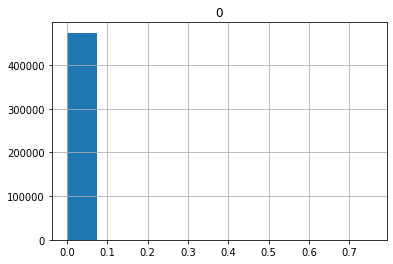

In [101]:
df = pd.DataFrame([vocab_ranking.values()])
df = df.T
df.hist()

In [ ]:
plt.bar(vocab_ranking.keys(), vocab_ranking.values(), width=0.1, color='g')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/balla/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-97-15d1e7174e29>", line 1, in <module>
    plt.bar(vocab_ranking.keys(), vocab_ranking.values(), width=0.1, color='g')
  File "/home/balla/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py", line 2653, in bar
    **({"data": data} if data is not None else {}), **kwargs)
  File "/home/balla/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py", line 1361, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/home/balla/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py", line 2371, in bar
    self.add_patch(r)
  File "/home/balla/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py", line 2169, in add_patch
    p.set_clip_path(self.patch)
  File "/home/balla/anaconda3/lib/python3.7/site-packages/matp


KeyboardInterrupt



KeyboardInterrupt: 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <function flush_figures at 0x7f4debe86c20> (for post_execute):
Traceback (most recent call last):
  File "/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel/pylab/backend_inline.py", line 43, in show
    metadata=_fetch_figure_metadata(figure_manager.canvas.figure)
  File "/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel/pylab/backend_inline.py", line 181, in _fetch_figure_metadata
    for axes in fig.axes
  File "/home/balla/anaconda3/lib/python3.7/site-packages/ipykernel/pylab/backend_inline.py", line 183, in <listcomp>
    for label in axis.get_ticklabels()])
  File "/home/balla/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py", line 1227, in get_ticklabels
    return self.get_majorticklabels()
  File "/home/balla/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py", line 1179, in get_majorticklabels
    ticks = self.get_major_ticks()
  File "/home/balla/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py", line 1350, in get_ma

In [66]:
print({k:numb_of_paper_per_vocab[k] for k in range(20) if k in numb_of_paper_per_vocab})

{}


In [57]:
vocab_ranking = dict(sorted(numb_of_paper_per_vocab.items(), key=lambda item: item[1]))

In [60]:
vocab_ranking[:20]

TypeError: unhashable type: 'slice'

In [47]:
sd =[set(x) for x in list(report_2018['Total'])]

In [ ]:
erasing_vocab += ['이하','본문','초록','참조','영문','보고서','자료집','제안서','기입','원문','확인','차년도','년','부록','방안','중심','']

In [ ]:
for i in tqdm(range(len(all_data3))):
    whole[i] = [word for word in whole[i] if word not in erasing_vocab]